In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
boston_house_prices = datasets.load_boston()
boston_house_prices

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

#### Boston dataset key값

In [3]:
print(boston_house_prices.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


#### Boston dataset

In [4]:
print(boston_house_prices.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


#### Y값

In [5]:
print(boston_house_prices.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

#### Feature

In [6]:
# Feature에 대한 설명은 아래 "Boston dataset 정보 확인"에 있음
print(boston_house_prices.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Boston dataset 정보 확인

In [7]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Boston dataset 이름 및 위치

In [8]:
print(boston_house_prices.filename)

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/boston_house_prices.csv


#### Boston dataset을 DataFrame으로 생성

In [9]:
# X, Y를 DataFrame에 같이 생성
boston_house_prices_df = pd.DataFrame(data=boston_house_prices.data, columns=boston_house_prices.feature_names)
boston_house_prices_df["PRICE"] = boston_house_prices.target
boston_house_prices_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### X, Y 분리

In [10]:
X = boston_house_prices_df.iloc[:,:-1]    # 마지막 컬럼(PRICE => Y값) 제외
Y = boston_house_prices_df["PRICE"]

#### Train / Test 나누기

In [11]:
# shuffle해서 Train / Test 나눔
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

#### 선형회귀(Linear Regression) 모델

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
prediction = linear_regression.predict(X_test)

In [13]:
mse = mean_squared_error(Y_test, prediction) 
r2 = r2_score(Y_test, prediction) 
print("MSE : {0:.3f}".format(mse))
print("RMSE : {0:.3f}".format(np.sqrt(mse))) 
print("r2 : {0:.3f}".format(r2))

# y = m1x1 + m2x2 + m3x2 + ... + b라고 가정
# x가 1씩 증가할 때마다 y가 m만큼 증가 => ex) m1 = -0.1이면 x1이 1만큼 증가하면 y는 -0.1만큼 증가(0.1만큼 감소)
# 즉, 기울기가 음수라고 영향이 없는 것이 아님 => x가 증가할 때마다 m씩 감소한다는 패턴이 있다는 의미이기 때문
print("기울기(m) : {}".format(np.round(linear_regression.coef_,1)))    # 뒤의 숫자 1은 소수점 첫째자리까지 => n을 입력하면 소수점 n째자리까지
print("절편(b) : {}".format(linear_regression.intercept_))

MSE : 31.237
RMSE : 5.589
r2 : 0.694
기울기(m) : [ -0.1   0.1   0.    3.5 -17.2   3.7  -0.   -1.7   0.3  -0.   -0.9   0.
  -0.5]
절편(b) : 37.32216640195552


#### 모델 정확도(Train)

In [14]:
print('모델 정확도 : ', linear_regression.score(X_train, Y_train))    # score 함수는 입력값으로 X, Y를 받음

모델 정확도 :  0.7510362442970301


#### 모델 정확도(Test)

In [15]:
from sklearn.metrics import accuracy_score    # accuracy_score은 분류 시 사용하는 정확도이기 때문에 회귀에서는 에러 발생
print('정확도 : ', linear_regression.score(X_test, Y_test))    # score 함수는 입력값으로 X, Y를 받음

정확도 :  0.6940589095437547


#### 시각화

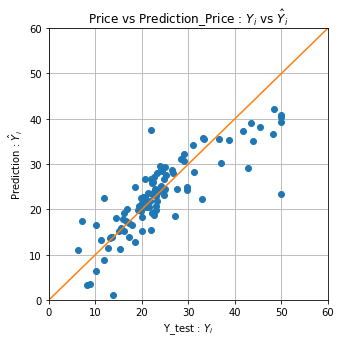

In [16]:
# X축 : Y값, Y축 : 예측값 => 즉, 데이터 분포가 기울기가 1인 직선에 가까울수록 예측을 잘한 것 => 값이 서로 같으면 y = 1x가 되기 때문

# 그래프 설정
plt.rcParams["figure.figsize"] = (5,5)    # 그래프 사이즈 조정
plt.rcParams['axes.grid'] = True    # 눈금 표시

# X축, Y축 범위 설정
plt.xlim(0, 60)  # X축 범위 설정 (start, end) => 이렇게 그래프 범위를 설정해줄 수도 있음, 최대값이 50이므로 넉넉하게 크기는 60으로 설정
plt.ylim(0, 60)  # Y축 범위 설정 (start, end)

# 제목 표시
plt.xlabel("Y_test : $Y_i$")    # X축 제목
plt.ylabel("Prediction : $\hat{Y}_i$")    # Y축 제목
plt.title("Price vs Prediction_Price : $Y_i$ vs $\hat{Y}_i$")    # 전체 제목

# 값들을 점으로 표시
plt.plot(Y_test, prediction, 'o') # 'o' 옵션은 점으로 표시 => draw dots

# 기울기가 1인 직선 표시
plt.plot([0,60], [0,60])